In [1]:
#IMPORTANDO BIBLIOTECAS
import pandas as pd

In [2]:
#IMPORTANDO DADOS E ESTRUTURANDO O DATAFRAME
df_alti = pd.read_excel('diferenca_altimetria_clean.xlsx')
col_list = df_alti.columns.tolist()
trats = col_list[2:]
const = 0.0
for trat in trats:
    df_alti[trat + '_diff'] = df_alti[trat] - df_alti['NIV']+const

In [3]:
#DATAFRAME DAS DIFERENÇAS
df_diff = df_alti[df_alti.columns[5:]]
df_diff.head()
df_diff.describe()
diff_trats = df_diff.columns.tolist()

#DATAFRAME DAS DIFERENÇAS ABSOLUTAS
df_diff_abs = df_diff.abs()
df_diff_abs.head()
df_diff_abs.describe()

#SALVANDO A ESTATISTICA DESCRITIVA EM UMA TABELA
with pd.ExcelWriter('estatistica_descritiva_diferencas.xlsx') as writer:
    df_diff.describe().to_excel(writer, sheet_name='Diferencas')
    df_diff_abs.describe().to_excel(writer, sheet_name='Diferencas_Absolutas')

C:\Users\lobat\AppData\Local\Temp\ipykernel_18488\2035944292.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot([df_diff[col] for col in df_diff.columns],
C:\Users\lobat\AppData\Local\Temp\ipykernel_18488\2035944292.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot([df_diff_abs[col] for col in df_diff_abs.columns],


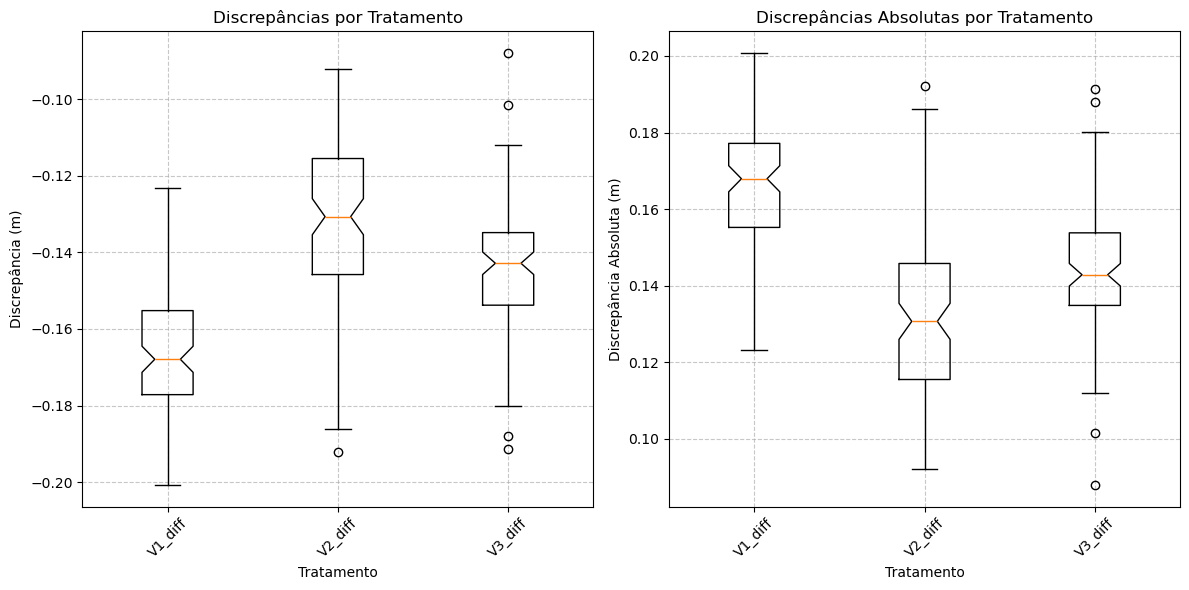

<Figure size 640x480 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot for discrepancies
ax1.boxplot([df_diff[col] for col in df_diff.columns], 
            labels=df_diff.columns,
            notch=True)
ax1.set_title('Discrepâncias por Tratamento')
ax1.set_ylabel('Discrepância (m)')
ax1.set_xlabel('Tratamento')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, linestyle='--', alpha=0.7)

# Boxplot for absolute discrepancies
ax2.boxplot([df_diff_abs[col] for col in df_diff_abs.columns],
            labels=df_diff_abs.columns,
            notch=True)
ax2.set_title('Discrepâncias Absolutas por Tratamento')
ax2.set_ytick_labels('Discrepância Absoluta (m)')
ax2.set_xlabel('Tratamento')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, linestyle='--', alpha=0.7)



# Adjust layout and display
plt.tight_layout()
plt.show()

# Save high-resolution figure
plt.savefig('boxplots_discrepancias.png', dpi=300, bbox_inches='tight')

In [ ]:
#teste de normalidade dos tratamentos
import numpy as np
from scipy.stats import shapiro, gaussian_kde
data_box_abs = [df_diff[diff_trats].dropna().values for trat in trats]
shapiro_results = {}
for i, data in enumerate(data_box_abs):
    stat, p_value = shapiro(data)
    shapiro_results[trats[i]] = (stat, p_value) # Armazena o resultado do teste
    print(f'Tratamento: {trats[i]}, Estatística de Shapiro-Wilk: {stat:.4f}, p-valor: {p_value:.4f}')

# Análise de densidade para dados não normais   
import matplotlib.pyplot as plt
fig, axs = plt.subplots(len(data_box_abs), 1, figsize=(8, 4 * len(data_box_abs)))
for i, data in enumerate(data_box_abs):
    data = np.array(data)
    data = data[~np.isnan(data)]
    if len(data) > 1:
        kde = gaussian_kde(data)
        min_val, max_val = np.percentile(data, [25, 75])
        x_vals = np.linspace(min_val - 3 * kde.factor, max_val + 3 * kde.factor, 1000)
        axs[i].plot(x_vals, kde(x_vals), label='KDE')
        axs[i].hist(data, bins=30, density=True, alpha=0.5, label='Histograma')
        axs[i].set_title(f'Análise de Densidade - {trats[i]}')
        axs[i].set_xlabel('Discrepância Absoluta (m)')
        axs[i].set_ylabel('Densidade')
        axs[i].legend()
plt.tight_layout()
plt.show()
plt.savefig('densidade_discrepancias_absolutas.png', dpi=300, bbox_inches='tight')

#Teste de homocedasticidade de Levene
from scipy.stats import levene
levene_results = levene(*data_box_abs)
print(f'Teste de Levene - Estatística: {levene_results.statistic:.4f}, p-valor: {levene_results.pvalue:.4f}')
'''
#Como os dados não são normais e não possuem homocedasticidade, será utilizado o teste não paramétrico de Kruskal-Wallis
from scipy.stats import kruskal
kruskal_results = kruskal(*data_box_abs)
print(f'Teste de Kruskal-Wallis - Estatística: {kruskal_results.statistic:.4f}, p-valor: {kruskal_results.pvalue:.4f}')
#Teste post-hoc de Dunn com correção de Bonferroni
import scikit_posthocs as sp        
dunn_results = sp.posthoc_dunn(data_box_abs, p_adjust='bonferroni')
dunn_results.index = trats
dunn_results.columns = trats
print('Teste post-hoc de Dunn com correção de Bonferroni:')
print(dunn_results)
dunn_results.to_excel('dunn_posthoc_results.xlsx')

'''

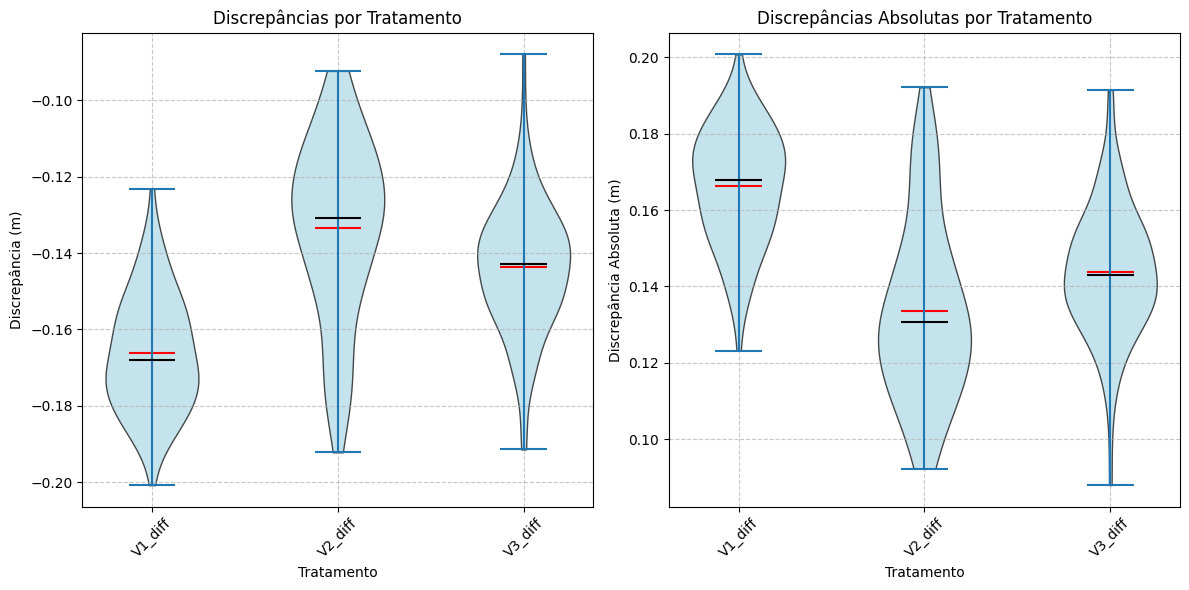

<Figure size 640x480 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Violin plot for discrepancies
parts1 = ax1.violinplot([df_diff[col] for col in df_diff.columns], 
                      showmeans=True, showmedians=True)
ax1.set_title('Discrepâncias por Tratamento')
ax1.set_ylabel('Discrepância (m)')
ax1.set_xlabel('Tratamento')
ax1.set_xticks(np.arange(1, len(df_diff.columns) + 1))
ax1.set_xticklabels(df_diff.columns, rotation=45)
ax1.grid(True, linestyle='--', alpha=0.7)

# Violin plot for absolute discrepancies
parts2 = ax2.violinplot([df_diff_abs[col] for col in df_diff_abs.columns],
                      showmeans=True, showmedians=True)
ax2.set_title('Discrepâncias Absolutas por Tratamento')
ax2.set_ylabel('Discrepância Absoluta (m)')
ax2.set_xlabel('Tratamento')
ax2.set_xticks(np.arange(1, len(df_diff_abs.columns) + 1))
ax2.set_xticklabels(df_diff_abs.columns, rotation=45)
ax2.grid(True, linestyle='--', alpha=0.7)

# Customize violin plots
colors = ['blue', 'blue']
for parts in [parts1, parts2]:
    for pc in parts['bodies']:
        pc.set_facecolor('lightblue')
        pc.set_edgecolor('black')
        pc.set_alpha(0.7)
    parts['cmeans'].set_color('red')
    parts['cmedians'].set_color('black')

# Adjust layout and display
plt.tight_layout()
plt.show()

# Save high-resolution figure
plt.savefig('violin_discrepancias.png', dpi=300, bbox_inches='tight')

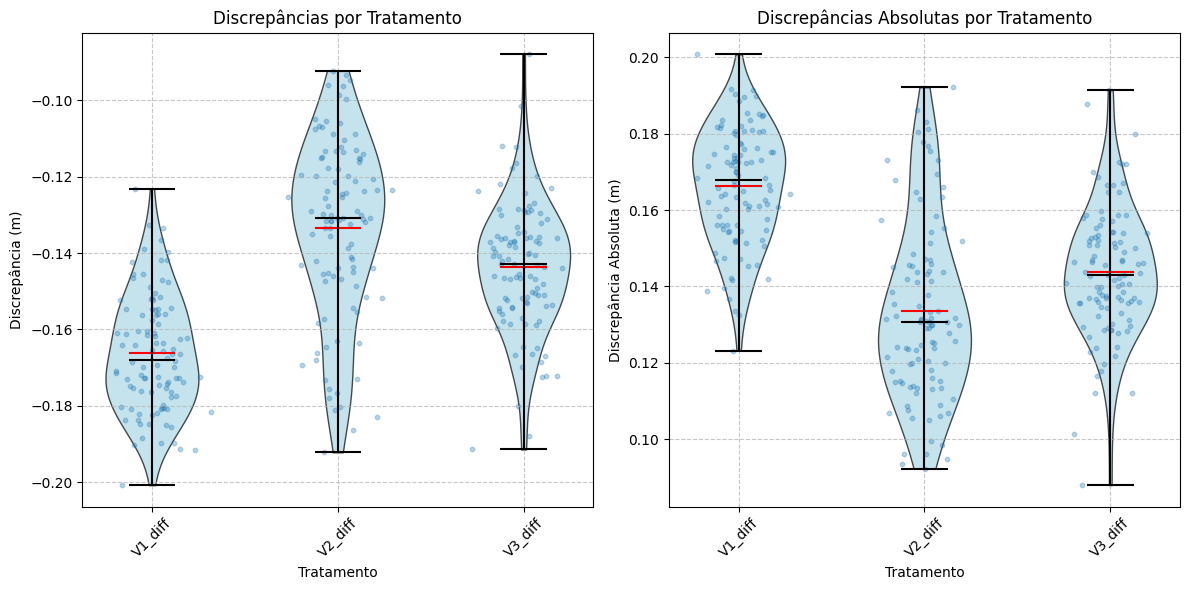

<Figure size 640x480 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Get data ranges from boxplots for consistent scaling
diff_data = [df_diff[col] for col in df_diff.columns]
abs_data = [df_diff_abs[col] for col in df_diff_abs.columns]

# Violin plot for discrepancies with outliers
parts1 = ax1.violinplot(diff_data, 
                      showmeans=True, showmedians=True,
                      showextrema=True)
ax1.scatter(np.concatenate([np.full_like(d, i+1, dtype=float) + 
           0.1*np.random.randn(len(d)) for i, d in enumerate(diff_data)]),
           np.concatenate(diff_data), alpha=0.3, s=10)
ax1.set_title('Discrepâncias por Tratamento')
ax1.set_ylabel('Discrepância (m)')
ax1.set_xlabel('Tratamento')
ax1.set_xticks(np.arange(1, len(df_diff.columns) + 1))
ax1.set_xticklabels(df_diff.columns, rotation=45)
ax1.grid(True, linestyle='--', alpha=0.7)

# Violin plot for absolute discrepancies with outliers
parts2 = ax2.violinplot(abs_data,
                      showmeans=True, showmedians=True,
                      showextrema=True)
ax2.scatter(np.concatenate([np.full_like(d, i+1, dtype=float) + 
           0.1*np.random.randn(len(d)) for i, d in enumerate(abs_data)]),
           np.concatenate(abs_data), alpha=0.3, s=10)
ax2.set_title('Discrepâncias Absolutas por Tratamento')
ax2.set_ylabel('Discrepância Absoluta (m)')
ax2.set_xlabel('Tratamento')
ax2.set_xticks(np.arange(1, len(df_diff_abs.columns) + 1))
ax2.set_xticklabels(df_diff_abs.columns, rotation=45)
ax2.grid(True, linestyle='--', alpha=0.7)

# Customize violin plots
for parts in [parts1, parts2]:
    for pc in parts['bodies']:
        pc.set_facecolor('lightblue')
        pc.set_edgecolor('black')
        pc.set_alpha(0.7)
    parts['cmeans'].set_color('red')
    parts['cmedians'].set_color('black')
    parts['cbars'].set_color('black')
    parts['cmins'].set_color('black')
    parts['cmaxes'].set_color('black')

# Adjust layout and display
plt.tight_layout()
plt.show()

# Save high-resolution figure
plt.savefig('violin_discrepancias.png', dpi=300, bbox_inches='tight')